In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from qiskit import QuantumCircuit, Aer
from qiskit.aqua import QuantumInstance

from vqa_poisson import VQAforPoisson

## Experiments

In [3]:
def experiment(bc, num_trials, num_qubits_list, num_layers, qins):
    
    print('-----------'+bc+' boundary condition --------------')
    
    data = {'num_qubits':[], 'obj_count':[], 'circ_count':[], 'iter_count':[], 'err':[], 'params':[], 'q_sol':[], 'cl_sol':[]}
    
    for num_qubits in tqdm(num_qubits_list):
        print('-------------------------')
        print('num_qubits:', num_qubits)
        
        # set oracle for f vector
        oracle_f = QuantumCircuit(num_qubits)
        oracle_f.x(num_qubits-1)
        oracle_f.h(oracle_f.qubits)
    
        # set vqa instance
        vqa = VQAforPoisson(num_qubits, num_layers, bc, oracle_f=oracle_f, qinstance=qins)

        obj_counts = []
        circ_counts = []
        iter_counts = []
        err = []
        params = []
        q_sol = []
    
        for seed in range(num_trials):
        
            np.random.seed(seed)
        
            x0 = list(4*np.pi*np.random.rand(vqa.num_params))
            res = vqa.minimize(x0, method='bfgs', save_logs=True)
    
            obj_counts.append(vqa.objective_counts)
            circ_counts.append(vqa.circuit_counts)
            iter_counts.append(len(vqa.objective_count_logs))
            err.append(vqa.get_errors(res['x'])['trace'])
            params.append(res['x'])
            q_sol.append(vqa.get_sol(res['x']).real)
            
            print('trial:', seed, 'Err.:', err[-1])
        
        data['num_qubits'].append(num_qubits)
        data['obj_count'].append(obj_counts)
        data['circ_count'].append(circ_counts)
        data['iter_count'].append(iter_counts)
        data['err'].append(err)
        data['params'].append(params)
        data['q_sol'].append(q_sol)
        data['cl_sol'].append(vqa.get_cl_sol().real)
        
    return data

In [4]:
t0 = time.time()
optimizer = 'bfgs'
num_layers = 5
num_trials = 10
num_qubits_list = list(range(2, 6))
qins = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=42)

# bc: Periodic, Neumann, or Dirichlet
data_p = experiment('Periodic', num_trials, num_qubits_list, num_layers, qins)
data_d = experiment('Dirichlet', num_trials, num_qubits_list, num_layers, qins)
data_n = experiment('Neumann', num_trials, num_qubits_list, num_layers, qins)           

-----------Periodic boundary condition --------------


  0%|          | 0/4 [00:00<?, ?it/s]

-------------------------
num_qubits: 2
It.: 00001, Obj.: -2.285670e-01
It.: 00002, Obj.: -2.291968e-01
It.: 00003, Obj.: -2.350849e-01
It.: 00004, Obj.: -2.446321e-01
It.: 00005, Obj.: -2.498447e-01
It.: 00006, Obj.: -2.498691e-01
It.: 00007, Obj.: -2.498698e-01
It.: 00008, Obj.: -2.498698e-01
It.: 00009, Obj.: -2.498699e-01
It.: 00010, Obj.: -2.498699e-01
It.: 00011, Obj.: -2.498700e-01
It.: 00012, Obj.: -2.498702e-01
It.: 00013, Obj.: -2.498706e-01
It.: 00014, Obj.: -2.498712e-01
It.: 00015, Obj.: -2.498723e-01
It.: 00016, Obj.: -2.498737e-01
It.: 00017, Obj.: -2.498745e-01
It.: 00018, Obj.: -2.498750e-01
It.: 00019, Obj.: -2.498750e-01
It.: 00020, Obj.: -2.498750e-01
It.: 00021, Obj.: -2.498751e-01
trial: 0 Err.: 0.00044050257780307265
It.: 00001, Obj.: -2.126949e-01
It.: 00002, Obj.: -2.377257e-01
It.: 00003, Obj.: -2.497306e-01
It.: 00004, Obj.: -2.498676e-01
It.: 00005, Obj.: -2.498725e-01
It.: 00006, Obj.: -2.498725e-01
It.: 00007, Obj.: -2.498726e-01
It.: 00008, Obj.: -2.49872

It.: 00015, Obj.: -7.487143e-01
It.: 00016, Obj.: -7.487210e-01
It.: 00017, Obj.: -7.487329e-01
It.: 00018, Obj.: -7.487468e-01
It.: 00019, Obj.: -7.487513e-01
It.: 00020, Obj.: -7.487520e-01
It.: 00021, Obj.: -7.487521e-01
It.: 00022, Obj.: -7.487521e-01
It.: 00023, Obj.: -7.487521e-01
It.: 00024, Obj.: -7.487521e-01
It.: 00025, Obj.: -7.487521e-01
It.: 00026, Obj.: -7.487521e-01
It.: 00027, Obj.: -7.487521e-01
trial: 2 Err.: 0.00010063830585819646
It.: 00001, Obj.: -6.672918e-01
It.: 00002, Obj.: -6.814020e-01
It.: 00003, Obj.: -7.068481e-01
It.: 00004, Obj.: -7.331740e-01
It.: 00005, Obj.: -7.383075e-01
It.: 00006, Obj.: -7.457679e-01
It.: 00007, Obj.: -7.478670e-01
It.: 00008, Obj.: -7.485389e-01
It.: 00009, Obj.: -7.486540e-01
It.: 00010, Obj.: -7.486569e-01
It.: 00011, Obj.: -7.486579e-01
It.: 00012, Obj.: -7.486592e-01
It.: 00013, Obj.: -7.486616e-01
It.: 00014, Obj.: -7.486660e-01
It.: 00015, Obj.: -7.486740e-01
It.: 00016, Obj.: -7.486879e-01
It.: 00017, Obj.: -7.487079e-01
It

It.: 00036, Obj.: -2.732295e+00
It.: 00037, Obj.: -2.732310e+00
It.: 00038, Obj.: -2.732320e+00
It.: 00039, Obj.: -2.732325e+00
It.: 00040, Obj.: -2.732330e+00
It.: 00041, Obj.: -2.732337e+00
It.: 00042, Obj.: -2.732344e+00
It.: 00043, Obj.: -2.732349e+00
It.: 00044, Obj.: -2.732351e+00
It.: 00045, Obj.: -2.732352e+00
It.: 00046, Obj.: -2.732353e+00
It.: 00047, Obj.: -2.732354e+00
It.: 00048, Obj.: -2.732356e+00
It.: 00049, Obj.: -2.732357e+00
It.: 00050, Obj.: -2.732357e+00
It.: 00051, Obj.: -2.732358e+00
It.: 00052, Obj.: -2.732358e+00
It.: 00053, Obj.: -2.732359e+00
It.: 00054, Obj.: -2.732359e+00
It.: 00055, Obj.: -2.732359e+00
It.: 00056, Obj.: -2.732360e+00
It.: 00057, Obj.: -2.732360e+00
It.: 00058, Obj.: -2.732360e+00
It.: 00059, Obj.: -2.732360e+00
It.: 00060, Obj.: -2.732360e+00
It.: 00061, Obj.: -2.732360e+00
It.: 00062, Obj.: -2.732361e+00
It.: 00063, Obj.: -2.732361e+00
It.: 00064, Obj.: -2.732361e+00
It.: 00065, Obj.: -2.732362e+00
It.: 00066, Obj.: -2.732362e+00
It.: 000

It.: 00005, Obj.: -8.562911e-01
It.: 00006, Obj.: -1.157993e+00
It.: 00007, Obj.: -1.530054e+00
It.: 00008, Obj.: -1.835465e+00
It.: 00009, Obj.: -2.044261e+00
It.: 00010, Obj.: -2.099077e+00
It.: 00011, Obj.: -2.188114e+00
It.: 00012, Obj.: -2.342009e+00
It.: 00013, Obj.: -2.546958e+00
It.: 00014, Obj.: -2.620735e+00
It.: 00015, Obj.: -2.689480e+00
It.: 00016, Obj.: -2.711503e+00
It.: 00017, Obj.: -2.721434e+00
It.: 00018, Obj.: -2.727691e+00
It.: 00019, Obj.: -2.729154e+00
It.: 00020, Obj.: -2.730756e+00
It.: 00021, Obj.: -2.731601e+00
It.: 00022, Obj.: -2.731714e+00
It.: 00023, Obj.: -2.731796e+00
It.: 00024, Obj.: -2.731807e+00
It.: 00025, Obj.: -2.731820e+00
It.: 00026, Obj.: -2.731826e+00
It.: 00027, Obj.: -2.731833e+00
It.: 00028, Obj.: -2.731848e+00
It.: 00029, Obj.: -2.731875e+00
It.: 00030, Obj.: -2.731926e+00
It.: 00031, Obj.: -2.732009e+00
It.: 00032, Obj.: -2.732060e+00
It.: 00033, Obj.: -2.732133e+00
It.: 00034, Obj.: -2.732197e+00
It.: 00035, Obj.: -2.732215e+00
It.: 000

It.: 00047, Obj.: -2.732364e+00
It.: 00048, Obj.: -2.732365e+00
It.: 00049, Obj.: -2.732365e+00
It.: 00050, Obj.: -2.732365e+00
It.: 00051, Obj.: -2.732365e+00
It.: 00052, Obj.: -2.732365e+00
It.: 00053, Obj.: -2.732366e+00
It.: 00054, Obj.: -2.732366e+00
It.: 00055, Obj.: -2.732366e+00
It.: 00056, Obj.: -2.732366e+00
It.: 00057, Obj.: -2.732366e+00
It.: 00058, Obj.: -2.732366e+00
It.: 00059, Obj.: -2.732366e+00
It.: 00060, Obj.: -2.732366e+00
It.: 00061, Obj.: -2.732366e+00
trial: 9 Err.: 0.00026609913916046283
-------------------------
num_qubits: 5
It.: 00001, Obj.: -3.621387e-01
It.: 00002, Obj.: -3.622582e-01
It.: 00003, Obj.: -1.161145e+00
It.: 00004, Obj.: -1.176283e+00
It.: 00005, Obj.: -1.316883e+00
It.: 00006, Obj.: -1.851877e+00
It.: 00007, Obj.: -2.038103e+00
It.: 00008, Obj.: -2.327376e+00
It.: 00009, Obj.: -2.603895e+00
It.: 00010, Obj.: -2.723957e+00
It.: 00011, Obj.: -2.904809e+00
It.: 00012, Obj.: -3.125787e+00
It.: 00013, Obj.: -3.354503e+00
It.: 00014, Obj.: -3.66915

It.: 00046, Obj.: -1.047917e+01
It.: 00047, Obj.: -1.047935e+01
It.: 00048, Obj.: -1.047963e+01
It.: 00049, Obj.: -1.047992e+01
It.: 00050, Obj.: -1.048014e+01
It.: 00051, Obj.: -1.048046e+01
It.: 00052, Obj.: -1.048090e+01
It.: 00053, Obj.: -1.048098e+01
It.: 00054, Obj.: -1.048109e+01
It.: 00055, Obj.: -1.048115e+01
It.: 00056, Obj.: -1.048118e+01
It.: 00057, Obj.: -1.048121e+01
It.: 00058, Obj.: -1.048122e+01
It.: 00059, Obj.: -1.048122e+01
It.: 00060, Obj.: -1.048122e+01
It.: 00061, Obj.: -1.048122e+01
It.: 00062, Obj.: -1.048122e+01
It.: 00063, Obj.: -1.048122e+01
It.: 00064, Obj.: -1.048122e+01
It.: 00065, Obj.: -1.048122e+01
It.: 00066, Obj.: -1.048122e+01
It.: 00067, Obj.: -1.048122e+01
It.: 00068, Obj.: -1.048123e+01
It.: 00069, Obj.: -1.048123e+01
It.: 00070, Obj.: -1.048123e+01
It.: 00071, Obj.: -1.048123e+01
It.: 00072, Obj.: -1.048123e+01
It.: 00073, Obj.: -1.048123e+01
It.: 00074, Obj.: -1.048123e+01
It.: 00075, Obj.: -1.048123e+01
It.: 00076, Obj.: -1.048123e+01
It.: 000

It.: 00051, Obj.: -1.047177e+01
It.: 00052, Obj.: -1.047440e+01
It.: 00053, Obj.: -1.047736e+01
It.: 00054, Obj.: -1.047783e+01
It.: 00055, Obj.: -1.047864e+01
It.: 00056, Obj.: -1.047959e+01
It.: 00057, Obj.: -1.048004e+01
It.: 00058, Obj.: -1.048024e+01
It.: 00059, Obj.: -1.048037e+01
It.: 00060, Obj.: -1.048055e+01
It.: 00061, Obj.: -1.048067e+01
It.: 00062, Obj.: -1.048076e+01
It.: 00063, Obj.: -1.048089e+01
It.: 00064, Obj.: -1.048102e+01
It.: 00065, Obj.: -1.048111e+01
It.: 00066, Obj.: -1.048113e+01
It.: 00067, Obj.: -1.048115e+01
It.: 00068, Obj.: -1.048116e+01
It.: 00069, Obj.: -1.048117e+01
It.: 00070, Obj.: -1.048119e+01
It.: 00071, Obj.: -1.048122e+01
It.: 00072, Obj.: -1.048123e+01
It.: 00073, Obj.: -1.048123e+01
It.: 00074, Obj.: -1.048123e+01
It.: 00075, Obj.: -1.048123e+01
It.: 00076, Obj.: -1.048123e+01
It.: 00077, Obj.: -1.048123e+01
It.: 00078, Obj.: -1.048123e+01
It.: 00079, Obj.: -1.048123e+01
It.: 00080, Obj.: -1.048123e+01
It.: 00081, Obj.: -1.048123e+01
It.: 000

It.: 00048, Obj.: -1.041879e+01
It.: 00049, Obj.: -1.042537e+01
It.: 00050, Obj.: -1.043335e+01
It.: 00051, Obj.: -1.044413e+01
It.: 00052, Obj.: -1.044874e+01
It.: 00053, Obj.: -1.045617e+01
It.: 00054, Obj.: -1.046119e+01
It.: 00055, Obj.: -1.046397e+01
It.: 00056, Obj.: -1.046782e+01
It.: 00057, Obj.: -1.046947e+01
It.: 00058, Obj.: -1.047153e+01
It.: 00059, Obj.: -1.047338e+01
It.: 00060, Obj.: -1.047555e+01
It.: 00061, Obj.: -1.047672e+01
It.: 00062, Obj.: -1.047724e+01
It.: 00063, Obj.: -1.047787e+01
It.: 00064, Obj.: -1.047855e+01
It.: 00065, Obj.: -1.047877e+01
It.: 00066, Obj.: -1.047913e+01
It.: 00067, Obj.: -1.047956e+01
It.: 00068, Obj.: -1.047992e+01
It.: 00069, Obj.: -1.048011e+01
It.: 00070, Obj.: -1.048019e+01
It.: 00071, Obj.: -1.048027e+01
It.: 00072, Obj.: -1.048038e+01
It.: 00073, Obj.: -1.048054e+01
It.: 00074, Obj.: -1.048072e+01
It.: 00075, Obj.: -1.048083e+01
It.: 00076, Obj.: -1.048095e+01
It.: 00077, Obj.: -1.048099e+01
It.: 00078, Obj.: -1.048106e+01
It.: 000

  0%|          | 0/4 [00:00<?, ?it/s]

-------------------------
num_qubits: 2
It.: 00001, Obj.: -3.126749e-01
It.: 00002, Obj.: -3.129659e-01
It.: 00003, Obj.: -3.244216e-01
It.: 00004, Obj.: -3.424768e-01
It.: 00005, Obj.: -3.492451e-01
It.: 00006, Obj.: -3.495209e-01
It.: 00007, Obj.: -3.496807e-01
It.: 00008, Obj.: -3.497444e-01
It.: 00009, Obj.: -3.497500e-01
It.: 00010, Obj.: -3.497502e-01
It.: 00011, Obj.: -3.497502e-01
trial: 0 Err.: 4.0860415936335726e-05
It.: 00001, Obj.: -3.454326e-01
It.: 00002, Obj.: -3.483665e-01
It.: 00003, Obj.: -3.488300e-01
It.: 00004, Obj.: -3.493741e-01
It.: 00005, Obj.: -3.495685e-01
It.: 00006, Obj.: -3.497366e-01
It.: 00007, Obj.: -3.497495e-01
It.: 00008, Obj.: -3.497502e-01
It.: 00009, Obj.: -3.497502e-01
trial: 1 Err.: 4.326698351930208e-05
It.: 00001, Obj.: -3.475942e-01
It.: 00002, Obj.: -3.486940e-01
It.: 00003, Obj.: -3.492418e-01
It.: 00004, Obj.: -3.497453e-01
It.: 00005, Obj.: -3.497498e-01
It.: 00006, Obj.: -3.497502e-01
trial: 2 Err.: 4.588929627229461e-05
It.: 00001, Obj.

It.: 00001, Obj.: -6.482169e-01
It.: 00002, Obj.: -6.547817e-01
It.: 00003, Obj.: -6.670399e-01
It.: 00004, Obj.: -7.704271e-01
It.: 00005, Obj.: -8.844208e-01
It.: 00006, Obj.: -9.172499e-01
It.: 00007, Obj.: -9.483741e-01
It.: 00008, Obj.: -9.558454e-01
It.: 00009, Obj.: -9.659613e-01
It.: 00010, Obj.: -9.689644e-01
It.: 00011, Obj.: -9.695162e-01
It.: 00012, Obj.: -9.701107e-01
It.: 00013, Obj.: -9.701609e-01
It.: 00014, Obj.: -9.701801e-01
It.: 00015, Obj.: -9.701803e-01
It.: 00016, Obj.: -9.701803e-01
trial: 9 Err.: 9.645152500205937e-05
-------------------------
num_qubits: 4
It.: 00001, Obj.: -5.015055e-01
It.: 00002, Obj.: -5.023381e-01
It.: 00003, Obj.: -1.014514e+00
It.: 00004, Obj.: -1.136656e+00
It.: 00005, Obj.: -1.349582e+00
It.: 00006, Obj.: -1.718242e+00
It.: 00007, Obj.: -2.055330e+00
It.: 00008, Obj.: -2.234132e+00
It.: 00009, Obj.: -2.407571e+00
It.: 00010, Obj.: -2.492918e+00
It.: 00011, Obj.: -2.640883e+00
It.: 00012, Obj.: -2.856178e+00
It.: 00013, Obj.: -2.968789

It.: 00036, Obj.: -3.197246e+00
It.: 00037, Obj.: -3.197246e+00
It.: 00038, Obj.: -3.197246e+00
It.: 00039, Obj.: -3.197246e+00
trial: 5 Err.: 0.0002713976632818308
It.: 00001, Obj.: -1.372037e-01
It.: 00002, Obj.: -1.891317e-01
It.: 00003, Obj.: -3.640628e-01
It.: 00004, Obj.: -4.238087e-01
It.: 00005, Obj.: -6.833408e-01
It.: 00006, Obj.: -8.518829e-01
It.: 00007, Obj.: -1.086773e+00
It.: 00008, Obj.: -1.286222e+00
It.: 00009, Obj.: -1.615589e+00
It.: 00010, Obj.: -1.982795e+00
It.: 00011, Obj.: -2.215316e+00
It.: 00012, Obj.: -2.297883e+00
It.: 00013, Obj.: -2.396560e+00
It.: 00014, Obj.: -2.548978e+00
It.: 00015, Obj.: -2.729119e+00
It.: 00016, Obj.: -2.773898e+00
It.: 00017, Obj.: -2.854257e+00
It.: 00018, Obj.: -2.955006e+00
It.: 00019, Obj.: -3.078758e+00
It.: 00020, Obj.: -3.109412e+00
It.: 00021, Obj.: -3.129175e+00
It.: 00022, Obj.: -3.150005e+00
It.: 00023, Obj.: -3.161227e+00
It.: 00024, Obj.: -3.173101e+00
It.: 00025, Obj.: -3.182796e+00
It.: 00026, Obj.: -3.185204e+00
It.

It.: 00099, Obj.: -1.140767e+01
It.: 00100, Obj.: -1.140768e+01
It.: 00101, Obj.: -1.140769e+01
It.: 00102, Obj.: -1.140769e+01
It.: 00103, Obj.: -1.140770e+01
It.: 00104, Obj.: -1.140771e+01
It.: 00105, Obj.: -1.140772e+01
It.: 00106, Obj.: -1.140772e+01
It.: 00107, Obj.: -1.140773e+01
It.: 00108, Obj.: -1.140773e+01
It.: 00109, Obj.: -1.140774e+01
It.: 00110, Obj.: -1.140776e+01
It.: 00111, Obj.: -1.140777e+01
It.: 00112, Obj.: -1.140778e+01
It.: 00113, Obj.: -1.140778e+01
It.: 00114, Obj.: -1.140778e+01
It.: 00115, Obj.: -1.140778e+01
It.: 00116, Obj.: -1.140778e+01
It.: 00117, Obj.: -1.140779e+01
It.: 00118, Obj.: -1.140780e+01
It.: 00119, Obj.: -1.140781e+01
It.: 00120, Obj.: -1.140783e+01
It.: 00121, Obj.: -1.140785e+01
It.: 00122, Obj.: -1.140788e+01
It.: 00123, Obj.: -1.140789e+01
It.: 00124, Obj.: -1.140791e+01
It.: 00125, Obj.: -1.140794e+01
It.: 00126, Obj.: -1.140798e+01
It.: 00127, Obj.: -1.140801e+01
It.: 00128, Obj.: -1.140803e+01
It.: 00129, Obj.: -1.140804e+01
It.: 001

It.: 00356, Obj.: -1.140835e+01
It.: 00357, Obj.: -1.140835e+01
It.: 00358, Obj.: -1.140835e+01
It.: 00359, Obj.: -1.140835e+01
It.: 00360, Obj.: -1.140835e+01
It.: 00361, Obj.: -1.140835e+01
It.: 00362, Obj.: -1.140835e+01
It.: 00363, Obj.: -1.140835e+01
It.: 00364, Obj.: -1.140835e+01
It.: 00365, Obj.: -1.140835e+01
It.: 00366, Obj.: -1.140835e+01
It.: 00367, Obj.: -1.140835e+01
It.: 00368, Obj.: -1.140835e+01
It.: 00369, Obj.: -1.140835e+01
It.: 00370, Obj.: -1.140835e+01
It.: 00371, Obj.: -1.140835e+01
It.: 00372, Obj.: -1.140835e+01
It.: 00373, Obj.: -1.140835e+01
It.: 00374, Obj.: -1.140835e+01
It.: 00375, Obj.: -1.140835e+01
It.: 00376, Obj.: -1.140835e+01
It.: 00377, Obj.: -1.140835e+01
It.: 00378, Obj.: -1.140835e+01
It.: 00379, Obj.: -1.140835e+01
It.: 00380, Obj.: -1.140835e+01
It.: 00381, Obj.: -1.140835e+01
It.: 00382, Obj.: -1.140835e+01
It.: 00383, Obj.: -1.140835e+01
It.: 00384, Obj.: -1.140835e+01
It.: 00385, Obj.: -1.140835e+01
It.: 00386, Obj.: -1.140835e+01
It.: 003

It.: 00134, Obj.: -1.140818e+01
It.: 00135, Obj.: -1.140819e+01
It.: 00136, Obj.: -1.140819e+01
It.: 00137, Obj.: -1.140819e+01
It.: 00138, Obj.: -1.140819e+01
It.: 00139, Obj.: -1.140819e+01
It.: 00140, Obj.: -1.140819e+01
It.: 00141, Obj.: -1.140819e+01
It.: 00142, Obj.: -1.140819e+01
It.: 00143, Obj.: -1.140819e+01
It.: 00144, Obj.: -1.140820e+01
It.: 00145, Obj.: -1.140820e+01
It.: 00146, Obj.: -1.140820e+01
It.: 00147, Obj.: -1.140820e+01
It.: 00148, Obj.: -1.140820e+01
It.: 00149, Obj.: -1.140821e+01
It.: 00150, Obj.: -1.140821e+01
It.: 00151, Obj.: -1.140821e+01
It.: 00152, Obj.: -1.140821e+01
It.: 00153, Obj.: -1.140821e+01
It.: 00154, Obj.: -1.140821e+01
It.: 00155, Obj.: -1.140821e+01
It.: 00156, Obj.: -1.140822e+01
It.: 00157, Obj.: -1.140822e+01
It.: 00158, Obj.: -1.140822e+01
It.: 00159, Obj.: -1.140822e+01
It.: 00160, Obj.: -1.140822e+01
It.: 00161, Obj.: -1.140822e+01
It.: 00162, Obj.: -1.140822e+01
It.: 00163, Obj.: -1.140822e+01
It.: 00164, Obj.: -1.140822e+01
It.: 001

It.: 00391, Obj.: -1.140834e+01
It.: 00392, Obj.: -1.140834e+01
It.: 00393, Obj.: -1.140834e+01
It.: 00394, Obj.: -1.140834e+01
It.: 00395, Obj.: -1.140834e+01
It.: 00396, Obj.: -1.140834e+01
It.: 00397, Obj.: -1.140834e+01
It.: 00398, Obj.: -1.140834e+01
It.: 00399, Obj.: -1.140834e+01
It.: 00400, Obj.: -1.140834e+01
It.: 00401, Obj.: -1.140834e+01
It.: 00402, Obj.: -1.140834e+01
It.: 00403, Obj.: -1.140834e+01
It.: 00404, Obj.: -1.140834e+01
It.: 00405, Obj.: -1.140834e+01
It.: 00406, Obj.: -1.140834e+01
It.: 00407, Obj.: -1.140834e+01
It.: 00408, Obj.: -1.140834e+01
It.: 00409, Obj.: -1.140834e+01
It.: 00410, Obj.: -1.140834e+01
It.: 00411, Obj.: -1.140834e+01
It.: 00412, Obj.: -1.140835e+01
It.: 00413, Obj.: -1.140835e+01
It.: 00414, Obj.: -1.140835e+01
It.: 00415, Obj.: -1.140835e+01
It.: 00416, Obj.: -1.140835e+01
It.: 00417, Obj.: -1.140835e+01
It.: 00418, Obj.: -1.140835e+01
It.: 00419, Obj.: -1.140835e+01
It.: 00420, Obj.: -1.140835e+01
It.: 00421, Obj.: -1.140835e+01
It.: 004

It.: 00181, Obj.: -1.140810e+01
It.: 00182, Obj.: -1.140811e+01
It.: 00183, Obj.: -1.140811e+01
It.: 00184, Obj.: -1.140812e+01
It.: 00185, Obj.: -1.140812e+01
It.: 00186, Obj.: -1.140812e+01
It.: 00187, Obj.: -1.140812e+01
It.: 00188, Obj.: -1.140812e+01
It.: 00189, Obj.: -1.140812e+01
It.: 00190, Obj.: -1.140813e+01
It.: 00191, Obj.: -1.140814e+01
It.: 00192, Obj.: -1.140814e+01
It.: 00193, Obj.: -1.140815e+01
It.: 00194, Obj.: -1.140816e+01
It.: 00195, Obj.: -1.140816e+01
It.: 00196, Obj.: -1.140817e+01
It.: 00197, Obj.: -1.140817e+01
It.: 00198, Obj.: -1.140818e+01
It.: 00199, Obj.: -1.140819e+01
It.: 00200, Obj.: -1.140819e+01
It.: 00201, Obj.: -1.140820e+01
It.: 00202, Obj.: -1.140821e+01
It.: 00203, Obj.: -1.140822e+01
It.: 00204, Obj.: -1.140823e+01
It.: 00205, Obj.: -1.140823e+01
It.: 00206, Obj.: -1.140824e+01
It.: 00207, Obj.: -1.140824e+01
It.: 00208, Obj.: -1.140825e+01
It.: 00209, Obj.: -1.140825e+01
It.: 00210, Obj.: -1.140826e+01
It.: 00211, Obj.: -1.140826e+01
It.: 002

It.: 00105, Obj.: -1.140673e+01
It.: 00106, Obj.: -1.140674e+01
It.: 00107, Obj.: -1.140675e+01
It.: 00108, Obj.: -1.140678e+01
It.: 00109, Obj.: -1.140682e+01
It.: 00110, Obj.: -1.140685e+01
It.: 00111, Obj.: -1.140686e+01
It.: 00112, Obj.: -1.140687e+01
It.: 00113, Obj.: -1.140688e+01
It.: 00114, Obj.: -1.140689e+01
It.: 00115, Obj.: -1.140689e+01
It.: 00116, Obj.: -1.140690e+01
It.: 00117, Obj.: -1.140690e+01
It.: 00118, Obj.: -1.140691e+01
It.: 00119, Obj.: -1.140691e+01
It.: 00120, Obj.: -1.140692e+01
It.: 00121, Obj.: -1.140694e+01
It.: 00122, Obj.: -1.140695e+01
It.: 00123, Obj.: -1.140696e+01
It.: 00124, Obj.: -1.140698e+01
It.: 00125, Obj.: -1.140700e+01
It.: 00126, Obj.: -1.140702e+01
It.: 00127, Obj.: -1.140705e+01
It.: 00128, Obj.: -1.140708e+01
It.: 00129, Obj.: -1.140710e+01
It.: 00130, Obj.: -1.140712e+01
It.: 00131, Obj.: -1.140713e+01
It.: 00132, Obj.: -1.140715e+01
It.: 00133, Obj.: -1.140717e+01
It.: 00134, Obj.: -1.140718e+01
It.: 00135, Obj.: -1.140720e+01
It.: 001

It.: 00362, Obj.: -1.140834e+01
It.: 00363, Obj.: -1.140834e+01
It.: 00364, Obj.: -1.140834e+01
It.: 00365, Obj.: -1.140834e+01
It.: 00366, Obj.: -1.140834e+01
It.: 00367, Obj.: -1.140834e+01
It.: 00368, Obj.: -1.140834e+01
It.: 00369, Obj.: -1.140834e+01
It.: 00370, Obj.: -1.140834e+01
It.: 00371, Obj.: -1.140834e+01
It.: 00372, Obj.: -1.140834e+01
It.: 00373, Obj.: -1.140834e+01
It.: 00374, Obj.: -1.140834e+01
It.: 00375, Obj.: -1.140834e+01
It.: 00376, Obj.: -1.140834e+01
It.: 00377, Obj.: -1.140834e+01
It.: 00378, Obj.: -1.140834e+01
It.: 00379, Obj.: -1.140834e+01
It.: 00380, Obj.: -1.140834e+01
It.: 00381, Obj.: -1.140834e+01
It.: 00382, Obj.: -1.140834e+01
It.: 00383, Obj.: -1.140834e+01
It.: 00384, Obj.: -1.140834e+01
It.: 00385, Obj.: -1.140834e+01
It.: 00386, Obj.: -1.140834e+01
It.: 00387, Obj.: -1.140834e+01
It.: 00388, Obj.: -1.140834e+01
It.: 00389, Obj.: -1.140834e+01
It.: 00390, Obj.: -1.140834e+01
It.: 00391, Obj.: -1.140834e+01
It.: 00392, Obj.: -1.140834e+01
It.: 003

It.: 00016, Obj.: -4.691950e+00
It.: 00017, Obj.: -5.252616e+00
It.: 00018, Obj.: -6.170952e+00
It.: 00019, Obj.: -6.539257e+00
It.: 00020, Obj.: -7.059622e+00
It.: 00021, Obj.: -7.443783e+00
It.: 00022, Obj.: -7.642539e+00
It.: 00023, Obj.: -7.944047e+00
It.: 00024, Obj.: -8.424060e+00
It.: 00025, Obj.: -8.874755e+00
It.: 00026, Obj.: -9.359091e+00
It.: 00027, Obj.: -9.856462e+00
It.: 00028, Obj.: -1.008763e+01
It.: 00029, Obj.: -1.042997e+01
It.: 00030, Obj.: -1.054791e+01
It.: 00031, Obj.: -1.068183e+01
It.: 00032, Obj.: -1.079644e+01
It.: 00033, Obj.: -1.089327e+01
It.: 00034, Obj.: -1.103176e+01
It.: 00035, Obj.: -1.111728e+01
It.: 00036, Obj.: -1.115164e+01
It.: 00037, Obj.: -1.118846e+01
It.: 00038, Obj.: -1.123569e+01
It.: 00039, Obj.: -1.124413e+01
It.: 00040, Obj.: -1.125929e+01
It.: 00041, Obj.: -1.128700e+01
It.: 00042, Obj.: -1.132428e+01
It.: 00043, Obj.: -1.136053e+01
It.: 00044, Obj.: -1.137294e+01
It.: 00045, Obj.: -1.137982e+01
It.: 00046, Obj.: -1.138349e+01
It.: 000

It.: 00273, Obj.: -1.140814e+01
It.: 00274, Obj.: -1.140814e+01
It.: 00275, Obj.: -1.140815e+01
It.: 00276, Obj.: -1.140816e+01
It.: 00277, Obj.: -1.140816e+01
It.: 00278, Obj.: -1.140816e+01
It.: 00279, Obj.: -1.140816e+01
It.: 00280, Obj.: -1.140816e+01
It.: 00281, Obj.: -1.140816e+01
It.: 00282, Obj.: -1.140816e+01
It.: 00283, Obj.: -1.140817e+01
It.: 00284, Obj.: -1.140817e+01
It.: 00285, Obj.: -1.140817e+01
It.: 00286, Obj.: -1.140817e+01
It.: 00287, Obj.: -1.140817e+01
It.: 00288, Obj.: -1.140818e+01
It.: 00289, Obj.: -1.140818e+01
It.: 00290, Obj.: -1.140819e+01
It.: 00291, Obj.: -1.140819e+01
It.: 00292, Obj.: -1.140820e+01
It.: 00293, Obj.: -1.140821e+01
It.: 00294, Obj.: -1.140821e+01
It.: 00295, Obj.: -1.140822e+01
It.: 00296, Obj.: -1.140822e+01
It.: 00297, Obj.: -1.140822e+01
It.: 00298, Obj.: -1.140822e+01
It.: 00299, Obj.: -1.140822e+01
It.: 00300, Obj.: -1.140822e+01
It.: 00301, Obj.: -1.140823e+01
It.: 00302, Obj.: -1.140823e+01
It.: 00303, Obj.: -1.140823e+01
It.: 003

It.: 00530, Obj.: -1.140832e+01
It.: 00531, Obj.: -1.140832e+01
It.: 00532, Obj.: -1.140832e+01
It.: 00533, Obj.: -1.140832e+01
It.: 00534, Obj.: -1.140832e+01
It.: 00535, Obj.: -1.140832e+01
It.: 00536, Obj.: -1.140832e+01
It.: 00537, Obj.: -1.140832e+01
It.: 00538, Obj.: -1.140832e+01
It.: 00539, Obj.: -1.140832e+01
It.: 00540, Obj.: -1.140832e+01
It.: 00541, Obj.: -1.140832e+01
It.: 00542, Obj.: -1.140832e+01
It.: 00543, Obj.: -1.140832e+01
It.: 00544, Obj.: -1.140833e+01
It.: 00545, Obj.: -1.140833e+01
It.: 00546, Obj.: -1.140833e+01
It.: 00547, Obj.: -1.140833e+01
It.: 00548, Obj.: -1.140833e+01
It.: 00549, Obj.: -1.140833e+01
It.: 00550, Obj.: -1.140833e+01
It.: 00551, Obj.: -1.140833e+01
It.: 00552, Obj.: -1.140833e+01
It.: 00553, Obj.: -1.140833e+01
It.: 00554, Obj.: -1.140833e+01
It.: 00555, Obj.: -1.140833e+01
It.: 00556, Obj.: -1.140833e+01
It.: 00557, Obj.: -1.140833e+01
It.: 00558, Obj.: -1.140833e+01
It.: 00559, Obj.: -1.140833e+01
It.: 00560, Obj.: -1.140833e+01
It.: 005

It.: 00787, Obj.: -1.140835e+01
It.: 00788, Obj.: -1.140835e+01
It.: 00789, Obj.: -1.140835e+01
It.: 00790, Obj.: -1.140835e+01
It.: 00791, Obj.: -1.140835e+01
It.: 00792, Obj.: -1.140835e+01
It.: 00793, Obj.: -1.140835e+01
It.: 00794, Obj.: -1.140835e+01
It.: 00795, Obj.: -1.140835e+01
It.: 00796, Obj.: -1.140835e+01
It.: 00797, Obj.: -1.140835e+01
It.: 00798, Obj.: -1.140835e+01
It.: 00799, Obj.: -1.140835e+01
It.: 00800, Obj.: -1.140835e+01
It.: 00801, Obj.: -1.140835e+01
It.: 00802, Obj.: -1.140835e+01
It.: 00803, Obj.: -1.140835e+01
It.: 00804, Obj.: -1.140835e+01
It.: 00805, Obj.: -1.140835e+01
It.: 00806, Obj.: -1.140835e+01
It.: 00807, Obj.: -1.140835e+01
It.: 00808, Obj.: -1.140835e+01
It.: 00809, Obj.: -1.140835e+01
It.: 00810, Obj.: -1.140835e+01
It.: 00811, Obj.: -1.140835e+01
It.: 00812, Obj.: -1.140835e+01
It.: 00813, Obj.: -1.140835e+01
It.: 00814, Obj.: -1.140835e+01
It.: 00815, Obj.: -1.140835e+01
It.: 00816, Obj.: -1.140835e+01
It.: 00817, Obj.: -1.140835e+01
It.: 008

It.: 00081, Obj.: -1.140284e+01
It.: 00082, Obj.: -1.140289e+01
It.: 00083, Obj.: -1.140297e+01
It.: 00084, Obj.: -1.140306e+01
It.: 00085, Obj.: -1.140314e+01
It.: 00086, Obj.: -1.140325e+01
It.: 00087, Obj.: -1.140341e+01
It.: 00088, Obj.: -1.140355e+01
It.: 00089, Obj.: -1.140363e+01
It.: 00090, Obj.: -1.140370e+01
It.: 00091, Obj.: -1.140372e+01
It.: 00092, Obj.: -1.140376e+01
It.: 00093, Obj.: -1.140382e+01
It.: 00094, Obj.: -1.140387e+01
It.: 00095, Obj.: -1.140394e+01
It.: 00096, Obj.: -1.140399e+01
It.: 00097, Obj.: -1.140403e+01
It.: 00098, Obj.: -1.140408e+01
It.: 00099, Obj.: -1.140412e+01
It.: 00100, Obj.: -1.140414e+01
It.: 00101, Obj.: -1.140417e+01
It.: 00102, Obj.: -1.140421e+01
It.: 00103, Obj.: -1.140426e+01
It.: 00104, Obj.: -1.140431e+01
It.: 00105, Obj.: -1.140434e+01
It.: 00106, Obj.: -1.140438e+01
It.: 00107, Obj.: -1.140442e+01
It.: 00108, Obj.: -1.140444e+01
It.: 00109, Obj.: -1.140445e+01
It.: 00110, Obj.: -1.140447e+01
It.: 00111, Obj.: -1.140448e+01
It.: 001

It.: 00338, Obj.: -1.140826e+01
It.: 00339, Obj.: -1.140826e+01
It.: 00340, Obj.: -1.140826e+01
It.: 00341, Obj.: -1.140826e+01
It.: 00342, Obj.: -1.140826e+01
It.: 00343, Obj.: -1.140826e+01
It.: 00344, Obj.: -1.140826e+01
It.: 00345, Obj.: -1.140826e+01
It.: 00346, Obj.: -1.140826e+01
It.: 00347, Obj.: -1.140826e+01
It.: 00348, Obj.: -1.140826e+01
It.: 00349, Obj.: -1.140826e+01
It.: 00350, Obj.: -1.140826e+01
It.: 00351, Obj.: -1.140826e+01
It.: 00352, Obj.: -1.140826e+01
It.: 00353, Obj.: -1.140826e+01
It.: 00354, Obj.: -1.140826e+01
It.: 00355, Obj.: -1.140826e+01
It.: 00356, Obj.: -1.140826e+01
It.: 00357, Obj.: -1.140826e+01
It.: 00358, Obj.: -1.140826e+01
It.: 00359, Obj.: -1.140826e+01
It.: 00360, Obj.: -1.140826e+01
It.: 00361, Obj.: -1.140826e+01
It.: 00362, Obj.: -1.140826e+01
It.: 00363, Obj.: -1.140826e+01
It.: 00364, Obj.: -1.140826e+01
It.: 00365, Obj.: -1.140826e+01
It.: 00366, Obj.: -1.140826e+01
It.: 00367, Obj.: -1.140826e+01
It.: 00368, Obj.: -1.140826e+01
It.: 003

It.: 00595, Obj.: -1.140834e+01
It.: 00596, Obj.: -1.140834e+01
It.: 00597, Obj.: -1.140834e+01
It.: 00598, Obj.: -1.140834e+01
It.: 00599, Obj.: -1.140834e+01
It.: 00600, Obj.: -1.140834e+01
It.: 00601, Obj.: -1.140834e+01
It.: 00602, Obj.: -1.140834e+01
It.: 00603, Obj.: -1.140834e+01
It.: 00604, Obj.: -1.140834e+01
It.: 00605, Obj.: -1.140834e+01
It.: 00606, Obj.: -1.140834e+01
It.: 00607, Obj.: -1.140834e+01
It.: 00608, Obj.: -1.140834e+01
It.: 00609, Obj.: -1.140834e+01
It.: 00610, Obj.: -1.140834e+01
It.: 00611, Obj.: -1.140834e+01
It.: 00612, Obj.: -1.140834e+01
It.: 00613, Obj.: -1.140834e+01
It.: 00614, Obj.: -1.140834e+01
It.: 00615, Obj.: -1.140834e+01
It.: 00616, Obj.: -1.140834e+01
It.: 00617, Obj.: -1.140834e+01
It.: 00618, Obj.: -1.140834e+01
It.: 00619, Obj.: -1.140834e+01
It.: 00620, Obj.: -1.140834e+01
It.: 00621, Obj.: -1.140834e+01
It.: 00622, Obj.: -1.140834e+01
It.: 00623, Obj.: -1.140834e+01
It.: 00624, Obj.: -1.140834e+01
It.: 00625, Obj.: -1.140834e+01
It.: 006

It.: 00075, Obj.: -1.140501e+01
It.: 00076, Obj.: -1.140501e+01
It.: 00077, Obj.: -1.140501e+01
It.: 00078, Obj.: -1.140501e+01
It.: 00079, Obj.: -1.140501e+01
It.: 00080, Obj.: -1.140502e+01
It.: 00081, Obj.: -1.140503e+01
It.: 00082, Obj.: -1.140504e+01
It.: 00083, Obj.: -1.140506e+01
It.: 00084, Obj.: -1.140511e+01
It.: 00085, Obj.: -1.140516e+01
It.: 00086, Obj.: -1.140522e+01
It.: 00087, Obj.: -1.140533e+01
It.: 00088, Obj.: -1.140545e+01
It.: 00089, Obj.: -1.140549e+01
It.: 00090, Obj.: -1.140551e+01
It.: 00091, Obj.: -1.140553e+01
It.: 00092, Obj.: -1.140555e+01
It.: 00093, Obj.: -1.140556e+01
It.: 00094, Obj.: -1.140556e+01
It.: 00095, Obj.: -1.140556e+01
It.: 00096, Obj.: -1.140556e+01
It.: 00097, Obj.: -1.140556e+01
It.: 00098, Obj.: -1.140557e+01
It.: 00099, Obj.: -1.140557e+01
It.: 00100, Obj.: -1.140557e+01
It.: 00101, Obj.: -1.140558e+01
It.: 00102, Obj.: -1.140559e+01
It.: 00103, Obj.: -1.140560e+01
It.: 00104, Obj.: -1.140562e+01
It.: 00105, Obj.: -1.140566e+01
It.: 001

It.: 00332, Obj.: -1.140830e+01
It.: 00333, Obj.: -1.140830e+01
It.: 00334, Obj.: -1.140830e+01
It.: 00335, Obj.: -1.140830e+01
It.: 00336, Obj.: -1.140830e+01
It.: 00337, Obj.: -1.140830e+01
It.: 00338, Obj.: -1.140830e+01
It.: 00339, Obj.: -1.140830e+01
It.: 00340, Obj.: -1.140830e+01
It.: 00341, Obj.: -1.140830e+01
It.: 00342, Obj.: -1.140830e+01
It.: 00343, Obj.: -1.140830e+01
It.: 00344, Obj.: -1.140830e+01
It.: 00345, Obj.: -1.140830e+01
It.: 00346, Obj.: -1.140830e+01
It.: 00347, Obj.: -1.140830e+01
It.: 00348, Obj.: -1.140830e+01
It.: 00349, Obj.: -1.140830e+01
It.: 00350, Obj.: -1.140830e+01
It.: 00351, Obj.: -1.140830e+01
It.: 00352, Obj.: -1.140830e+01
It.: 00353, Obj.: -1.140830e+01
It.: 00354, Obj.: -1.140830e+01
It.: 00355, Obj.: -1.140830e+01
It.: 00356, Obj.: -1.140830e+01
It.: 00357, Obj.: -1.140830e+01
It.: 00358, Obj.: -1.140830e+01
It.: 00359, Obj.: -1.140830e+01
It.: 00360, Obj.: -1.140830e+01
It.: 00361, Obj.: -1.140830e+01
It.: 00362, Obj.: -1.140831e+01
It.: 003

It.: 00589, Obj.: -1.140834e+01
It.: 00590, Obj.: -1.140834e+01
It.: 00591, Obj.: -1.140834e+01
It.: 00592, Obj.: -1.140834e+01
It.: 00593, Obj.: -1.140834e+01
It.: 00594, Obj.: -1.140834e+01
It.: 00595, Obj.: -1.140834e+01
It.: 00596, Obj.: -1.140834e+01
It.: 00597, Obj.: -1.140834e+01
It.: 00598, Obj.: -1.140834e+01
It.: 00599, Obj.: -1.140834e+01
It.: 00600, Obj.: -1.140834e+01
It.: 00601, Obj.: -1.140834e+01
It.: 00602, Obj.: -1.140834e+01
It.: 00603, Obj.: -1.140834e+01
It.: 00604, Obj.: -1.140834e+01
It.: 00605, Obj.: -1.140834e+01
It.: 00606, Obj.: -1.140834e+01
It.: 00607, Obj.: -1.140834e+01
It.: 00608, Obj.: -1.140834e+01
It.: 00609, Obj.: -1.140834e+01
It.: 00610, Obj.: -1.140834e+01
It.: 00611, Obj.: -1.140834e+01
It.: 00612, Obj.: -1.140834e+01
It.: 00613, Obj.: -1.140834e+01
It.: 00614, Obj.: -1.140834e+01
It.: 00615, Obj.: -1.140834e+01
It.: 00616, Obj.: -1.140834e+01
It.: 00617, Obj.: -1.140834e+01
It.: 00618, Obj.: -1.140834e+01
It.: 00619, Obj.: -1.140834e+01
It.: 006

It.: 00846, Obj.: -1.140835e+01
It.: 00847, Obj.: -1.140835e+01
It.: 00848, Obj.: -1.140835e+01
It.: 00849, Obj.: -1.140835e+01
It.: 00850, Obj.: -1.140835e+01
It.: 00851, Obj.: -1.140835e+01
trial: 6 Err.: 0.0009527659137559142
It.: 00001, Obj.: -6.813973e-02
It.: 00002, Obj.: -6.899253e-02
It.: 00003, Obj.: -4.943034e-01
It.: 00004, Obj.: -5.018745e-01
It.: 00005, Obj.: -7.926419e-01
It.: 00006, Obj.: -9.858418e-01
It.: 00007, Obj.: -1.358553e+00
It.: 00008, Obj.: -1.607537e+00
It.: 00009, Obj.: -1.663222e+00
It.: 00010, Obj.: -2.030022e+00
It.: 00011, Obj.: -2.356530e+00
It.: 00012, Obj.: -2.492815e+00
It.: 00013, Obj.: -2.719679e+00
It.: 00014, Obj.: -2.999520e+00
It.: 00015, Obj.: -3.325060e+00
It.: 00016, Obj.: -3.698072e+00
It.: 00017, Obj.: -3.984308e+00
It.: 00018, Obj.: -4.119620e+00
It.: 00019, Obj.: -4.378099e+00
It.: 00020, Obj.: -4.860465e+00
It.: 00021, Obj.: -5.772340e+00
It.: 00022, Obj.: -6.420381e+00
It.: 00023, Obj.: -7.207234e+00
It.: 00024, Obj.: -7.697244e+00
It.

It.: 00250, Obj.: -1.140786e+01
It.: 00251, Obj.: -1.140787e+01
It.: 00252, Obj.: -1.140787e+01
It.: 00253, Obj.: -1.140788e+01
It.: 00254, Obj.: -1.140789e+01
It.: 00255, Obj.: -1.140790e+01
It.: 00256, Obj.: -1.140791e+01
It.: 00257, Obj.: -1.140792e+01
It.: 00258, Obj.: -1.140793e+01
It.: 00259, Obj.: -1.140793e+01
It.: 00260, Obj.: -1.140794e+01
It.: 00261, Obj.: -1.140794e+01
It.: 00262, Obj.: -1.140794e+01
It.: 00263, Obj.: -1.140794e+01
It.: 00264, Obj.: -1.140795e+01
It.: 00265, Obj.: -1.140795e+01
It.: 00266, Obj.: -1.140795e+01
It.: 00267, Obj.: -1.140795e+01
It.: 00268, Obj.: -1.140795e+01
It.: 00269, Obj.: -1.140796e+01
It.: 00270, Obj.: -1.140796e+01
It.: 00271, Obj.: -1.140796e+01
It.: 00272, Obj.: -1.140797e+01
It.: 00273, Obj.: -1.140797e+01
It.: 00274, Obj.: -1.140798e+01
It.: 00275, Obj.: -1.140799e+01
It.: 00276, Obj.: -1.140800e+01
It.: 00277, Obj.: -1.140800e+01
It.: 00278, Obj.: -1.140801e+01
It.: 00279, Obj.: -1.140801e+01
It.: 00280, Obj.: -1.140802e+01
It.: 002

It.: 00507, Obj.: -1.140835e+01
It.: 00508, Obj.: -1.140835e+01
It.: 00509, Obj.: -1.140835e+01
It.: 00510, Obj.: -1.140835e+01
It.: 00511, Obj.: -1.140835e+01
It.: 00512, Obj.: -1.140835e+01
It.: 00513, Obj.: -1.140835e+01
It.: 00514, Obj.: -1.140835e+01
It.: 00515, Obj.: -1.140835e+01
It.: 00516, Obj.: -1.140835e+01
It.: 00517, Obj.: -1.140835e+01
It.: 00518, Obj.: -1.140835e+01
It.: 00519, Obj.: -1.140835e+01
It.: 00520, Obj.: -1.140835e+01
It.: 00521, Obj.: -1.140835e+01
It.: 00522, Obj.: -1.140835e+01
It.: 00523, Obj.: -1.140835e+01
It.: 00524, Obj.: -1.140835e+01
It.: 00525, Obj.: -1.140835e+01
It.: 00526, Obj.: -1.140835e+01
It.: 00527, Obj.: -1.140835e+01
It.: 00528, Obj.: -1.140835e+01
It.: 00529, Obj.: -1.140835e+01
It.: 00530, Obj.: -1.140835e+01
It.: 00531, Obj.: -1.140835e+01
It.: 00532, Obj.: -1.140835e+01
It.: 00533, Obj.: -1.140835e+01
It.: 00534, Obj.: -1.140835e+01
It.: 00535, Obj.: -1.140835e+01
It.: 00536, Obj.: -1.140835e+01
It.: 00537, Obj.: -1.140835e+01
It.: 005

It.: 00216, Obj.: -1.140819e+01
It.: 00217, Obj.: -1.140819e+01
It.: 00218, Obj.: -1.140819e+01
It.: 00219, Obj.: -1.140819e+01
It.: 00220, Obj.: -1.140819e+01
It.: 00221, Obj.: -1.140819e+01
It.: 00222, Obj.: -1.140819e+01
It.: 00223, Obj.: -1.140820e+01
It.: 00224, Obj.: -1.140820e+01
It.: 00225, Obj.: -1.140820e+01
It.: 00226, Obj.: -1.140821e+01
It.: 00227, Obj.: -1.140821e+01
It.: 00228, Obj.: -1.140821e+01
It.: 00229, Obj.: -1.140821e+01
It.: 00230, Obj.: -1.140821e+01
It.: 00231, Obj.: -1.140821e+01
It.: 00232, Obj.: -1.140822e+01
It.: 00233, Obj.: -1.140822e+01
It.: 00234, Obj.: -1.140822e+01
It.: 00235, Obj.: -1.140823e+01
It.: 00236, Obj.: -1.140823e+01
It.: 00237, Obj.: -1.140823e+01
It.: 00238, Obj.: -1.140823e+01
It.: 00239, Obj.: -1.140824e+01
It.: 00240, Obj.: -1.140825e+01
It.: 00241, Obj.: -1.140825e+01
It.: 00242, Obj.: -1.140825e+01
It.: 00243, Obj.: -1.140825e+01
It.: 00244, Obj.: -1.140826e+01
It.: 00245, Obj.: -1.140826e+01
It.: 00246, Obj.: -1.140826e+01
It.: 002

It.: 00021, Obj.: -6.312852e+00
It.: 00022, Obj.: -6.658258e+00
It.: 00023, Obj.: -7.201334e+00
It.: 00024, Obj.: -7.861530e+00
It.: 00025, Obj.: -8.156576e+00
It.: 00026, Obj.: -8.370470e+00
It.: 00027, Obj.: -8.654667e+00
It.: 00028, Obj.: -8.813658e+00
It.: 00029, Obj.: -9.033916e+00
It.: 00030, Obj.: -9.355754e+00
It.: 00031, Obj.: -9.597304e+00
It.: 00032, Obj.: -9.716739e+00
It.: 00033, Obj.: -9.907128e+00
It.: 00034, Obj.: -1.024531e+01
It.: 00035, Obj.: -1.074544e+01
It.: 00036, Obj.: -1.094511e+01
It.: 00037, Obj.: -1.103639e+01
It.: 00038, Obj.: -1.110606e+01
It.: 00039, Obj.: -1.119818e+01
It.: 00040, Obj.: -1.127014e+01
It.: 00041, Obj.: -1.130904e+01
It.: 00042, Obj.: -1.132067e+01
It.: 00043, Obj.: -1.133897e+01
It.: 00044, Obj.: -1.136080e+01
It.: 00045, Obj.: -1.137056e+01
It.: 00046, Obj.: -1.138002e+01
It.: 00047, Obj.: -1.138201e+01
It.: 00048, Obj.: -1.138512e+01
It.: 00049, Obj.: -1.138863e+01
It.: 00050, Obj.: -1.139024e+01
It.: 00051, Obj.: -1.139226e+01
It.: 000

It.: 00278, Obj.: -1.140835e+01
It.: 00279, Obj.: -1.140835e+01
It.: 00280, Obj.: -1.140835e+01
It.: 00281, Obj.: -1.140835e+01
It.: 00282, Obj.: -1.140835e+01
It.: 00283, Obj.: -1.140835e+01
It.: 00284, Obj.: -1.140835e+01
It.: 00285, Obj.: -1.140835e+01
It.: 00286, Obj.: -1.140835e+01
It.: 00287, Obj.: -1.140835e+01
It.: 00288, Obj.: -1.140835e+01
It.: 00289, Obj.: -1.140835e+01
It.: 00290, Obj.: -1.140835e+01
It.: 00291, Obj.: -1.140835e+01
It.: 00292, Obj.: -1.140835e+01
It.: 00293, Obj.: -1.140835e+01
It.: 00294, Obj.: -1.140835e+01
It.: 00295, Obj.: -1.140835e+01
It.: 00296, Obj.: -1.140835e+01
It.: 00297, Obj.: -1.140835e+01
It.: 00298, Obj.: -1.140835e+01
It.: 00299, Obj.: -1.140835e+01
It.: 00300, Obj.: -1.140835e+01
It.: 00301, Obj.: -1.140835e+01
It.: 00302, Obj.: -1.140835e+01
It.: 00303, Obj.: -1.140835e+01
It.: 00304, Obj.: -1.140835e+01
It.: 00305, Obj.: -1.140835e+01
It.: 00306, Obj.: -1.140835e+01
It.: 00307, Obj.: -1.140835e+01
It.: 00308, Obj.: -1.140835e+01
It.: 003

  0%|          | 0/4 [00:00<?, ?it/s]

-------------------------
num_qubits: 2
It.: 00001, Obj.: -7.038353e-01
It.: 00002, Obj.: -7.039662e-01
It.: 00003, Obj.: -7.239190e-01
It.: 00004, Obj.: -7.480672e-01
It.: 00005, Obj.: -7.487364e-01
It.: 00006, Obj.: -7.487413e-01
It.: 00007, Obj.: -7.487429e-01
It.: 00008, Obj.: -7.487458e-01
It.: 00009, Obj.: -7.487500e-01
It.: 00010, Obj.: -7.487516e-01
It.: 00011, Obj.: -7.487521e-01
It.: 00012, Obj.: -7.487521e-01
It.: 00013, Obj.: -7.487521e-01
trial: 0 Err.: 0.00011413959737763434
It.: 00001, Obj.: -6.943109e-01
It.: 00002, Obj.: -7.112129e-01
It.: 00003, Obj.: -7.374189e-01
It.: 00004, Obj.: -7.479231e-01
It.: 00005, Obj.: -7.487241e-01
It.: 00006, Obj.: -7.487260e-01
It.: 00007, Obj.: -7.487266e-01
It.: 00008, Obj.: -7.487277e-01
It.: 00009, Obj.: -7.487299e-01
It.: 00010, Obj.: -7.487336e-01
It.: 00011, Obj.: -7.487390e-01
It.: 00012, Obj.: -7.487428e-01
It.: 00013, Obj.: -7.487482e-01
It.: 00014, Obj.: -7.487516e-01
It.: 00015, Obj.: -7.487521e-01
It.: 00016, Obj.: -7.48752

It.: 00032, Obj.: -2.732366e+00
trial: 1 Err.: 0.00026588299109393197
It.: 00001, Obj.: -9.588545e-02
It.: 00002, Obj.: -1.730911e+00
It.: 00003, Obj.: -1.733457e+00
It.: 00004, Obj.: -2.056423e+00
It.: 00005, Obj.: -2.261329e+00
It.: 00006, Obj.: -2.402024e+00
It.: 00007, Obj.: -2.536034e+00
It.: 00008, Obj.: -2.612942e+00
It.: 00009, Obj.: -2.660591e+00
It.: 00010, Obj.: -2.707579e+00
It.: 00011, Obj.: -2.729407e+00
It.: 00012, Obj.: -2.730711e+00
It.: 00013, Obj.: -2.732048e+00
It.: 00014, Obj.: -2.732171e+00
It.: 00015, Obj.: -2.732318e+00
It.: 00016, Obj.: -2.732324e+00
It.: 00017, Obj.: -2.732326e+00
It.: 00018, Obj.: -2.732330e+00
It.: 00019, Obj.: -2.732337e+00
It.: 00020, Obj.: -2.732348e+00
It.: 00021, Obj.: -2.732360e+00
It.: 00022, Obj.: -2.732364e+00
It.: 00023, Obj.: -2.732366e+00
It.: 00024, Obj.: -2.732366e+00
It.: 00025, Obj.: -2.732366e+00
It.: 00026, Obj.: -2.732366e+00
trial: 2 Err.: 0.00026595028794267165
It.: 00001, Obj.: -8.889797e-01
It.: 00002, Obj.: -8.995696e

It.: 00010, Obj.: -3.358852e+00
It.: 00011, Obj.: -3.784955e+00
It.: 00012, Obj.: -4.089615e+00
It.: 00013, Obj.: -4.655949e+00
It.: 00014, Obj.: -5.038024e+00
It.: 00015, Obj.: -5.261775e+00
It.: 00016, Obj.: -5.404134e+00
It.: 00017, Obj.: -5.620326e+00
It.: 00018, Obj.: -5.910864e+00
It.: 00019, Obj.: -6.421511e+00
It.: 00020, Obj.: -6.878121e+00
It.: 00021, Obj.: -7.213258e+00
It.: 00022, Obj.: -7.363970e+00
It.: 00023, Obj.: -7.625859e+00
It.: 00024, Obj.: -7.954560e+00
It.: 00025, Obj.: -8.098749e+00
It.: 00026, Obj.: -8.208723e+00
It.: 00027, Obj.: -8.375217e+00
It.: 00028, Obj.: -8.635261e+00
It.: 00029, Obj.: -8.914827e+00
It.: 00030, Obj.: -9.095621e+00
It.: 00031, Obj.: -9.200145e+00
It.: 00032, Obj.: -9.363359e+00
It.: 00033, Obj.: -9.639266e+00
It.: 00034, Obj.: -9.914340e+00
It.: 00035, Obj.: -1.001914e+01
It.: 00036, Obj.: -1.005910e+01
It.: 00037, Obj.: -1.010809e+01
It.: 00038, Obj.: -1.014882e+01
It.: 00039, Obj.: -1.016922e+01
It.: 00040, Obj.: -1.019730e+01
It.: 000

It.: 00003, Obj.: -9.935614e-01
It.: 00004, Obj.: -1.127793e+00
It.: 00005, Obj.: -1.350463e+00
It.: 00006, Obj.: -2.188542e+00
It.: 00007, Obj.: -2.639127e+00
It.: 00008, Obj.: -3.172591e+00
It.: 00009, Obj.: -3.314415e+00
It.: 00010, Obj.: -3.587440e+00
It.: 00011, Obj.: -4.131670e+00
It.: 00012, Obj.: -4.459551e+00
It.: 00013, Obj.: -4.584681e+00
It.: 00014, Obj.: -4.641817e+00
It.: 00015, Obj.: -4.666144e+00
It.: 00016, Obj.: -4.711175e+00
It.: 00017, Obj.: -5.065581e+00
It.: 00018, Obj.: -5.632977e+00
It.: 00019, Obj.: -5.872393e+00
It.: 00020, Obj.: -6.153987e+00
It.: 00021, Obj.: -6.638764e+00
It.: 00022, Obj.: -6.945272e+00
It.: 00023, Obj.: -7.093553e+00
It.: 00024, Obj.: -7.163108e+00
It.: 00025, Obj.: -7.276550e+00
It.: 00026, Obj.: -7.404766e+00
It.: 00027, Obj.: -7.568374e+00
It.: 00028, Obj.: -7.841312e+00
It.: 00029, Obj.: -8.099401e+00
It.: 00030, Obj.: -8.318117e+00
It.: 00031, Obj.: -8.442487e+00
It.: 00032, Obj.: -8.557468e+00
It.: 00033, Obj.: -8.637654e+00
It.: 000

It.: 00014, Obj.: -6.955240e+00
It.: 00015, Obj.: -7.099694e+00
It.: 00016, Obj.: -7.354087e+00
It.: 00017, Obj.: -7.807015e+00
It.: 00018, Obj.: -8.630115e+00
It.: 00019, Obj.: -9.213960e+00
It.: 00020, Obj.: -9.528576e+00
It.: 00021, Obj.: -9.869632e+00
It.: 00022, Obj.: -9.967043e+00
It.: 00023, Obj.: -1.009258e+01
It.: 00024, Obj.: -1.013966e+01
It.: 00025, Obj.: -1.021115e+01
It.: 00026, Obj.: -1.031267e+01
It.: 00027, Obj.: -1.033776e+01
It.: 00028, Obj.: -1.037356e+01
It.: 00029, Obj.: -1.040306e+01
It.: 00030, Obj.: -1.043835e+01
It.: 00031, Obj.: -1.046167e+01
It.: 00032, Obj.: -1.046648e+01
It.: 00033, Obj.: -1.047366e+01
It.: 00034, Obj.: -1.047690e+01
It.: 00035, Obj.: -1.047797e+01
It.: 00036, Obj.: -1.047958e+01
It.: 00037, Obj.: -1.047991e+01
It.: 00038, Obj.: -1.048045e+01
It.: 00039, Obj.: -1.048087e+01
It.: 00040, Obj.: -1.048099e+01
It.: 00041, Obj.: -1.048106e+01
It.: 00042, Obj.: -1.048114e+01
It.: 00043, Obj.: -1.048119e+01
It.: 00044, Obj.: -1.048122e+01
It.: 000

It.: 00097, Obj.: -3.873711e+01
It.: 00098, Obj.: -3.874233e+01
It.: 00099, Obj.: -3.874535e+01
It.: 00100, Obj.: -3.874851e+01
It.: 00101, Obj.: -3.875085e+01
It.: 00102, Obj.: -3.875167e+01
It.: 00103, Obj.: -3.875190e+01
It.: 00104, Obj.: -3.875199e+01
It.: 00105, Obj.: -3.875203e+01
It.: 00106, Obj.: -3.875205e+01
It.: 00107, Obj.: -3.875207e+01
It.: 00108, Obj.: -3.875210e+01
It.: 00109, Obj.: -3.875215e+01
It.: 00110, Obj.: -3.875218e+01
It.: 00111, Obj.: -3.875219e+01
It.: 00112, Obj.: -3.875219e+01
It.: 00113, Obj.: -3.875219e+01
It.: 00114, Obj.: -3.875219e+01
It.: 00115, Obj.: -3.875219e+01
It.: 00116, Obj.: -3.875220e+01
It.: 00117, Obj.: -3.875221e+01
It.: 00118, Obj.: -3.875222e+01
It.: 00119, Obj.: -3.875225e+01
It.: 00120, Obj.: -3.875229e+01
It.: 00121, Obj.: -3.875234e+01
It.: 00122, Obj.: -3.875242e+01
It.: 00123, Obj.: -3.875256e+01
It.: 00124, Obj.: -3.875277e+01
It.: 00125, Obj.: -3.875287e+01
It.: 00126, Obj.: -3.875291e+01
It.: 00127, Obj.: -3.875295e+01
It.: 001

It.: 00354, Obj.: -3.878010e+01
It.: 00355, Obj.: -3.878011e+01
It.: 00356, Obj.: -3.878012e+01
It.: 00357, Obj.: -3.878013e+01
It.: 00358, Obj.: -3.878014e+01
It.: 00359, Obj.: -3.878017e+01
It.: 00360, Obj.: -3.878019e+01
It.: 00361, Obj.: -3.878022e+01
It.: 00362, Obj.: -3.878025e+01
It.: 00363, Obj.: -3.878027e+01
It.: 00364, Obj.: -3.878030e+01
It.: 00365, Obj.: -3.878034e+01
It.: 00366, Obj.: -3.878036e+01
It.: 00367, Obj.: -3.878038e+01
It.: 00368, Obj.: -3.878040e+01
It.: 00369, Obj.: -3.878043e+01
It.: 00370, Obj.: -3.878044e+01
It.: 00371, Obj.: -3.878046e+01
It.: 00372, Obj.: -3.878048e+01
It.: 00373, Obj.: -3.878050e+01
It.: 00374, Obj.: -3.878054e+01
It.: 00375, Obj.: -3.878057e+01
It.: 00376, Obj.: -3.878061e+01
It.: 00377, Obj.: -3.878068e+01
It.: 00378, Obj.: -3.878069e+01
It.: 00379, Obj.: -3.878072e+01
It.: 00380, Obj.: -3.878076e+01
It.: 00381, Obj.: -3.878082e+01
It.: 00382, Obj.: -3.878084e+01
It.: 00383, Obj.: -3.878087e+01
It.: 00384, Obj.: -3.878090e+01
It.: 003

It.: 00611, Obj.: -3.878170e+01
It.: 00612, Obj.: -3.878170e+01
It.: 00613, Obj.: -3.878170e+01
It.: 00614, Obj.: -3.878170e+01
It.: 00615, Obj.: -3.878170e+01
It.: 00616, Obj.: -3.878170e+01
It.: 00617, Obj.: -3.878170e+01
It.: 00618, Obj.: -3.878170e+01
It.: 00619, Obj.: -3.878170e+01
It.: 00620, Obj.: -3.878170e+01
It.: 00621, Obj.: -3.878170e+01
It.: 00622, Obj.: -3.878170e+01
It.: 00623, Obj.: -3.878170e+01
It.: 00624, Obj.: -3.878170e+01
It.: 00625, Obj.: -3.878170e+01
It.: 00626, Obj.: -3.878170e+01
It.: 00627, Obj.: -3.878170e+01
It.: 00628, Obj.: -3.878171e+01
It.: 00629, Obj.: -3.878171e+01
It.: 00630, Obj.: -3.878171e+01
It.: 00631, Obj.: -3.878171e+01
It.: 00632, Obj.: -3.878171e+01
It.: 00633, Obj.: -3.878171e+01
It.: 00634, Obj.: -3.878171e+01
It.: 00635, Obj.: -3.878171e+01
It.: 00636, Obj.: -3.878171e+01
It.: 00637, Obj.: -3.878171e+01
It.: 00638, Obj.: -3.878171e+01
It.: 00639, Obj.: -3.878171e+01
It.: 00640, Obj.: -3.878171e+01
It.: 00641, Obj.: -3.878171e+01
It.: 006

It.: 00026, Obj.: -1.100262e+01
It.: 00027, Obj.: -1.178199e+01
It.: 00028, Obj.: -1.279944e+01
It.: 00029, Obj.: -1.390893e+01
It.: 00030, Obj.: -1.442136e+01
It.: 00031, Obj.: -1.513658e+01
It.: 00032, Obj.: -1.604612e+01
It.: 00033, Obj.: -1.665593e+01
It.: 00034, Obj.: -1.716011e+01
It.: 00035, Obj.: -1.753999e+01
It.: 00036, Obj.: -1.807108e+01
It.: 00037, Obj.: -1.863309e+01
It.: 00038, Obj.: -1.926428e+01
It.: 00039, Obj.: -2.009333e+01
It.: 00040, Obj.: -2.090706e+01
It.: 00041, Obj.: -2.190067e+01
It.: 00042, Obj.: -2.231919e+01
It.: 00043, Obj.: -2.290555e+01
It.: 00044, Obj.: -2.390661e+01
It.: 00045, Obj.: -2.544224e+01
It.: 00046, Obj.: -2.637218e+01
It.: 00047, Obj.: -2.676700e+01
It.: 00048, Obj.: -2.708937e+01
It.: 00049, Obj.: -2.750023e+01
It.: 00050, Obj.: -2.773675e+01
It.: 00051, Obj.: -2.810246e+01
It.: 00052, Obj.: -2.867568e+01
It.: 00053, Obj.: -2.929763e+01
It.: 00054, Obj.: -2.955202e+01
It.: 00055, Obj.: -2.980165e+01
It.: 00056, Obj.: -3.024729e+01
It.: 000

It.: 00283, Obj.: -3.878170e+01
It.: 00284, Obj.: -3.878170e+01
It.: 00285, Obj.: -3.878170e+01
It.: 00286, Obj.: -3.878171e+01
It.: 00287, Obj.: -3.878171e+01
It.: 00288, Obj.: -3.878171e+01
It.: 00289, Obj.: -3.878171e+01
It.: 00290, Obj.: -3.878171e+01
It.: 00291, Obj.: -3.878171e+01
It.: 00292, Obj.: -3.878171e+01
It.: 00293, Obj.: -3.878171e+01
It.: 00294, Obj.: -3.878171e+01
It.: 00295, Obj.: -3.878171e+01
It.: 00296, Obj.: -3.878171e+01
It.: 00297, Obj.: -3.878171e+01
It.: 00298, Obj.: -3.878171e+01
It.: 00299, Obj.: -3.878171e+01
It.: 00300, Obj.: -3.878171e+01
It.: 00301, Obj.: -3.878171e+01
It.: 00302, Obj.: -3.878171e+01
It.: 00303, Obj.: -3.878171e+01
It.: 00304, Obj.: -3.878171e+01
It.: 00305, Obj.: -3.878171e+01
It.: 00306, Obj.: -3.878171e+01
It.: 00307, Obj.: -3.878171e+01
It.: 00308, Obj.: -3.878171e+01
It.: 00309, Obj.: -3.878171e+01
It.: 00310, Obj.: -3.878171e+01
It.: 00311, Obj.: -3.878171e+01
It.: 00312, Obj.: -3.878171e+01
It.: 00313, Obj.: -3.878171e+01
It.: 003

It.: 00211, Obj.: -3.878165e+01
It.: 00212, Obj.: -3.878166e+01
It.: 00213, Obj.: -3.878166e+01
It.: 00214, Obj.: -3.878167e+01
It.: 00215, Obj.: -3.878168e+01
It.: 00216, Obj.: -3.878170e+01
It.: 00217, Obj.: -3.878170e+01
It.: 00218, Obj.: -3.878171e+01
It.: 00219, Obj.: -3.878171e+01
It.: 00220, Obj.: -3.878171e+01
It.: 00221, Obj.: -3.878171e+01
It.: 00222, Obj.: -3.878171e+01
It.: 00223, Obj.: -3.878171e+01
It.: 00224, Obj.: -3.878171e+01
It.: 00225, Obj.: -3.878171e+01
It.: 00226, Obj.: -3.878171e+01
It.: 00227, Obj.: -3.878171e+01
It.: 00228, Obj.: -3.878171e+01
It.: 00229, Obj.: -3.878171e+01
It.: 00230, Obj.: -3.878171e+01
It.: 00231, Obj.: -3.878171e+01
It.: 00232, Obj.: -3.878171e+01
It.: 00233, Obj.: -3.878171e+01
It.: 00234, Obj.: -3.878171e+01
It.: 00235, Obj.: -3.878171e+01
It.: 00236, Obj.: -3.878171e+01
It.: 00237, Obj.: -3.878171e+01
It.: 00238, Obj.: -3.878171e+01
It.: 00239, Obj.: -3.878171e+01
It.: 00240, Obj.: -3.878171e+01
It.: 00241, Obj.: -3.878171e+01
trial: 3

It.: 00009, Obj.: -1.148759e+00
It.: 00010, Obj.: -1.610381e+00
It.: 00011, Obj.: -1.781365e+00
It.: 00012, Obj.: -1.872821e+00
It.: 00013, Obj.: -2.040970e+00
It.: 00014, Obj.: -2.954580e+00
It.: 00015, Obj.: -3.194203e+00
It.: 00016, Obj.: -3.255907e+00
It.: 00017, Obj.: -3.371536e+00
It.: 00018, Obj.: -4.244032e+00
It.: 00019, Obj.: -4.412966e+00
It.: 00020, Obj.: -4.593912e+00
It.: 00021, Obj.: -4.892486e+00
It.: 00022, Obj.: -5.438169e+00
It.: 00023, Obj.: -6.368714e+00
It.: 00024, Obj.: -7.831972e+00
It.: 00025, Obj.: -9.757644e+00
It.: 00026, Obj.: -1.013392e+01
It.: 00027, Obj.: -1.030255e+01
It.: 00028, Obj.: -1.054265e+01
It.: 00029, Obj.: -1.093914e+01
It.: 00030, Obj.: -1.165957e+01
It.: 00031, Obj.: -1.262158e+01
It.: 00032, Obj.: -1.308437e+01
It.: 00033, Obj.: -1.374541e+01
It.: 00034, Obj.: -1.482689e+01
It.: 00035, Obj.: -1.561919e+01
It.: 00036, Obj.: -1.608953e+01
It.: 00037, Obj.: -1.673572e+01
It.: 00038, Obj.: -1.731879e+01
It.: 00039, Obj.: -1.826967e+01
It.: 000

It.: 00266, Obj.: -3.878133e+01
It.: 00267, Obj.: -3.878134e+01
It.: 00268, Obj.: -3.878134e+01
It.: 00269, Obj.: -3.878135e+01
It.: 00270, Obj.: -3.878136e+01
It.: 00271, Obj.: -3.878137e+01
It.: 00272, Obj.: -3.878139e+01
It.: 00273, Obj.: -3.878141e+01
It.: 00274, Obj.: -3.878142e+01
It.: 00275, Obj.: -3.878143e+01
It.: 00276, Obj.: -3.878144e+01
It.: 00277, Obj.: -3.878144e+01
It.: 00278, Obj.: -3.878144e+01
It.: 00279, Obj.: -3.878145e+01
It.: 00280, Obj.: -3.878145e+01
It.: 00281, Obj.: -3.878146e+01
It.: 00282, Obj.: -3.878147e+01
It.: 00283, Obj.: -3.878148e+01
It.: 00284, Obj.: -3.878148e+01
It.: 00285, Obj.: -3.878149e+01
It.: 00286, Obj.: -3.878150e+01
It.: 00287, Obj.: -3.878151e+01
It.: 00288, Obj.: -3.878151e+01
It.: 00289, Obj.: -3.878152e+01
It.: 00290, Obj.: -3.878152e+01
It.: 00291, Obj.: -3.878152e+01
It.: 00292, Obj.: -3.878153e+01
It.: 00293, Obj.: -3.878153e+01
It.: 00294, Obj.: -3.878154e+01
It.: 00295, Obj.: -3.878154e+01
It.: 00296, Obj.: -3.878154e+01
It.: 002

It.: 00523, Obj.: -3.878171e+01
It.: 00524, Obj.: -3.878171e+01
It.: 00525, Obj.: -3.878171e+01
It.: 00526, Obj.: -3.878171e+01
It.: 00527, Obj.: -3.878171e+01
It.: 00528, Obj.: -3.878171e+01
It.: 00529, Obj.: -3.878171e+01
It.: 00530, Obj.: -3.878171e+01
It.: 00531, Obj.: -3.878171e+01
It.: 00532, Obj.: -3.878171e+01
It.: 00533, Obj.: -3.878171e+01
It.: 00534, Obj.: -3.878171e+01
It.: 00535, Obj.: -3.878171e+01
It.: 00536, Obj.: -3.878171e+01
It.: 00537, Obj.: -3.878171e+01
It.: 00538, Obj.: -3.878171e+01
It.: 00539, Obj.: -3.878171e+01
It.: 00540, Obj.: -3.878171e+01
It.: 00541, Obj.: -3.878171e+01
It.: 00542, Obj.: -3.878171e+01
It.: 00543, Obj.: -3.878171e+01
It.: 00544, Obj.: -3.878171e+01
It.: 00545, Obj.: -3.878171e+01
It.: 00546, Obj.: -3.878171e+01
It.: 00547, Obj.: -3.878171e+01
It.: 00548, Obj.: -3.878171e+01
It.: 00549, Obj.: -3.878171e+01
It.: 00550, Obj.: -3.878171e+01
It.: 00551, Obj.: -3.878171e+01
It.: 00552, Obj.: -3.878171e+01
It.: 00553, Obj.: -3.878171e+01
It.: 005

It.: 00780, Obj.: -3.878171e+01
It.: 00781, Obj.: -3.878171e+01
It.: 00782, Obj.: -3.878171e+01
It.: 00783, Obj.: -3.878171e+01
It.: 00784, Obj.: -3.878171e+01
It.: 00785, Obj.: -3.878171e+01
It.: 00786, Obj.: -3.878171e+01
It.: 00787, Obj.: -3.878171e+01
It.: 00788, Obj.: -3.878171e+01
It.: 00789, Obj.: -3.878171e+01
It.: 00790, Obj.: -3.878171e+01
It.: 00791, Obj.: -3.878171e+01
It.: 00792, Obj.: -3.878171e+01
It.: 00793, Obj.: -3.878171e+01
It.: 00794, Obj.: -3.878171e+01
It.: 00795, Obj.: -3.878171e+01
It.: 00796, Obj.: -3.878171e+01
It.: 00797, Obj.: -3.878171e+01
It.: 00798, Obj.: -3.878171e+01
It.: 00799, Obj.: -3.878171e+01
It.: 00800, Obj.: -3.878171e+01
It.: 00801, Obj.: -3.878171e+01
It.: 00802, Obj.: -3.878171e+01
It.: 00803, Obj.: -3.878171e+01
It.: 00804, Obj.: -3.878171e+01
It.: 00805, Obj.: -3.878171e+01
It.: 00806, Obj.: -3.878171e+01
It.: 00807, Obj.: -3.878171e+01
It.: 00808, Obj.: -3.878171e+01
It.: 00809, Obj.: -3.878171e+01
It.: 00810, Obj.: -3.878171e+01
It.: 008

It.: 00106, Obj.: -3.872149e+01
It.: 00107, Obj.: -3.872245e+01
It.: 00108, Obj.: -3.872321e+01
It.: 00109, Obj.: -3.872388e+01
It.: 00110, Obj.: -3.872483e+01
It.: 00111, Obj.: -3.872583e+01
It.: 00112, Obj.: -3.872613e+01
It.: 00113, Obj.: -3.872664e+01
It.: 00114, Obj.: -3.872753e+01
It.: 00115, Obj.: -3.872900e+01
It.: 00116, Obj.: -3.873090e+01
It.: 00117, Obj.: -3.873182e+01
It.: 00118, Obj.: -3.873304e+01
It.: 00119, Obj.: -3.873453e+01
It.: 00120, Obj.: -3.873478e+01
It.: 00121, Obj.: -3.873516e+01
It.: 00122, Obj.: -3.873563e+01
It.: 00123, Obj.: -3.873627e+01
It.: 00124, Obj.: -3.873736e+01
It.: 00125, Obj.: -3.873914e+01
It.: 00126, Obj.: -3.874107e+01
It.: 00127, Obj.: -3.874279e+01
It.: 00128, Obj.: -3.874549e+01
It.: 00129, Obj.: -3.874728e+01
It.: 00130, Obj.: -3.874915e+01
It.: 00131, Obj.: -3.874947e+01
It.: 00132, Obj.: -3.875004e+01
It.: 00133, Obj.: -3.875097e+01
It.: 00134, Obj.: -3.875157e+01
It.: 00135, Obj.: -3.875222e+01
It.: 00136, Obj.: -3.875279e+01
It.: 001

It.: 00048, Obj.: -3.062182e+01
It.: 00049, Obj.: -3.104846e+01
It.: 00050, Obj.: -3.171016e+01
It.: 00051, Obj.: -3.269315e+01
It.: 00052, Obj.: -3.371202e+01
It.: 00053, Obj.: -3.423622e+01
It.: 00054, Obj.: -3.456591e+01
It.: 00055, Obj.: -3.498250e+01
It.: 00056, Obj.: -3.526735e+01
It.: 00057, Obj.: -3.559115e+01
It.: 00058, Obj.: -3.580994e+01
It.: 00059, Obj.: -3.595522e+01
It.: 00060, Obj.: -3.606719e+01
It.: 00061, Obj.: -3.624498e+01
It.: 00062, Obj.: -3.638961e+01
It.: 00063, Obj.: -3.659088e+01
It.: 00064, Obj.: -3.684317e+01
It.: 00065, Obj.: -3.698460e+01
It.: 00066, Obj.: -3.719277e+01
It.: 00067, Obj.: -3.735819e+01
It.: 00068, Obj.: -3.741866e+01
It.: 00069, Obj.: -3.752462e+01
It.: 00070, Obj.: -3.766196e+01
It.: 00071, Obj.: -3.777272e+01
It.: 00072, Obj.: -3.786649e+01
It.: 00073, Obj.: -3.792987e+01
It.: 00074, Obj.: -3.800967e+01
It.: 00075, Obj.: -3.805035e+01
It.: 00076, Obj.: -3.809958e+01
It.: 00077, Obj.: -3.815686e+01
It.: 00078, Obj.: -3.821641e+01
It.: 000

It.: 00144, Obj.: -3.872160e+01
It.: 00145, Obj.: -3.872258e+01
It.: 00146, Obj.: -3.872393e+01
It.: 00147, Obj.: -3.872554e+01
It.: 00148, Obj.: -3.872787e+01
It.: 00149, Obj.: -3.873005e+01
It.: 00150, Obj.: -3.873136e+01
It.: 00151, Obj.: -3.873157e+01
It.: 00152, Obj.: -3.873193e+01
It.: 00153, Obj.: -3.873243e+01
It.: 00154, Obj.: -3.873294e+01
It.: 00155, Obj.: -3.873330e+01
It.: 00156, Obj.: -3.873387e+01
It.: 00157, Obj.: -3.873481e+01
It.: 00158, Obj.: -3.873591e+01
It.: 00159, Obj.: -3.873679e+01
It.: 00160, Obj.: -3.873798e+01
It.: 00161, Obj.: -3.873916e+01
It.: 00162, Obj.: -3.874021e+01
It.: 00163, Obj.: -3.874095e+01
It.: 00164, Obj.: -3.874175e+01
It.: 00165, Obj.: -3.874242e+01
It.: 00166, Obj.: -3.874314e+01
It.: 00167, Obj.: -3.874396e+01
It.: 00168, Obj.: -3.874448e+01
It.: 00169, Obj.: -3.874494e+01
It.: 00170, Obj.: -3.874536e+01
It.: 00171, Obj.: -3.874567e+01
It.: 00172, Obj.: -3.874614e+01
It.: 00173, Obj.: -3.874663e+01
It.: 00174, Obj.: -3.874720e+01
It.: 001

It.: 00401, Obj.: -3.878155e+01
It.: 00402, Obj.: -3.878156e+01
It.: 00403, Obj.: -3.878156e+01
It.: 00404, Obj.: -3.878157e+01
It.: 00405, Obj.: -3.878157e+01
It.: 00406, Obj.: -3.878158e+01
It.: 00407, Obj.: -3.878158e+01
It.: 00408, Obj.: -3.878159e+01
It.: 00409, Obj.: -3.878159e+01
It.: 00410, Obj.: -3.878160e+01
It.: 00411, Obj.: -3.878160e+01
It.: 00412, Obj.: -3.878160e+01
It.: 00413, Obj.: -3.878160e+01
It.: 00414, Obj.: -3.878161e+01
It.: 00415, Obj.: -3.878161e+01
It.: 00416, Obj.: -3.878162e+01
It.: 00417, Obj.: -3.878163e+01
It.: 00418, Obj.: -3.878163e+01
It.: 00419, Obj.: -3.878163e+01
It.: 00420, Obj.: -3.878164e+01
It.: 00421, Obj.: -3.878164e+01
It.: 00422, Obj.: -3.878164e+01
It.: 00423, Obj.: -3.878165e+01
It.: 00424, Obj.: -3.878165e+01
It.: 00425, Obj.: -3.878165e+01
It.: 00426, Obj.: -3.878165e+01
It.: 00427, Obj.: -3.878165e+01
It.: 00428, Obj.: -3.878165e+01
It.: 00429, Obj.: -3.878165e+01
It.: 00430, Obj.: -3.878165e+01
It.: 00431, Obj.: -3.878165e+01
It.: 004

It.: 00039, Obj.: -1.884982e+01
It.: 00040, Obj.: -2.016184e+01
It.: 00041, Obj.: -2.081243e+01
It.: 00042, Obj.: -2.166089e+01
It.: 00043, Obj.: -2.212233e+01
It.: 00044, Obj.: -2.262504e+01
It.: 00045, Obj.: -2.299595e+01
It.: 00046, Obj.: -2.350854e+01
It.: 00047, Obj.: -2.401186e+01
It.: 00048, Obj.: -2.460091e+01
It.: 00049, Obj.: -2.555083e+01
It.: 00050, Obj.: -2.692841e+01
It.: 00051, Obj.: -2.728812e+01
It.: 00052, Obj.: -2.767240e+01
It.: 00053, Obj.: -2.828006e+01
It.: 00054, Obj.: -2.880995e+01
It.: 00055, Obj.: -2.908066e+01
It.: 00056, Obj.: -2.947286e+01
It.: 00057, Obj.: -2.997146e+01
It.: 00058, Obj.: -3.073239e+01
It.: 00059, Obj.: -3.144188e+01
It.: 00060, Obj.: -3.181712e+01
It.: 00061, Obj.: -3.242358e+01
It.: 00062, Obj.: -3.336837e+01
It.: 00063, Obj.: -3.446743e+01
It.: 00064, Obj.: -3.497109e+01
It.: 00065, Obj.: -3.533189e+01
It.: 00066, Obj.: -3.588093e+01
It.: 00067, Obj.: -3.599788e+01
It.: 00068, Obj.: -3.621313e+01
It.: 00069, Obj.: -3.651559e+01
It.: 000

It.: 00296, Obj.: -3.878093e+01
It.: 00297, Obj.: -3.878094e+01
It.: 00298, Obj.: -3.878095e+01
It.: 00299, Obj.: -3.878095e+01
It.: 00300, Obj.: -3.878096e+01
It.: 00301, Obj.: -3.878098e+01
It.: 00302, Obj.: -3.878100e+01
It.: 00303, Obj.: -3.878102e+01
It.: 00304, Obj.: -3.878104e+01
It.: 00305, Obj.: -3.878105e+01
It.: 00306, Obj.: -3.878106e+01
It.: 00307, Obj.: -3.878108e+01
It.: 00308, Obj.: -3.878111e+01
It.: 00309, Obj.: -3.878116e+01
It.: 00310, Obj.: -3.878117e+01
It.: 00311, Obj.: -3.878120e+01
It.: 00312, Obj.: -3.878124e+01
It.: 00313, Obj.: -3.878127e+01
It.: 00314, Obj.: -3.878129e+01
It.: 00315, Obj.: -3.878131e+01
It.: 00316, Obj.: -3.878131e+01
It.: 00317, Obj.: -3.878132e+01
It.: 00318, Obj.: -3.878132e+01
It.: 00319, Obj.: -3.878132e+01
It.: 00320, Obj.: -3.878132e+01
It.: 00321, Obj.: -3.878132e+01
It.: 00322, Obj.: -3.878132e+01
It.: 00323, Obj.: -3.878132e+01
It.: 00324, Obj.: -3.878132e+01
It.: 00325, Obj.: -3.878132e+01
It.: 00326, Obj.: -3.878132e+01
It.: 003

## plots

### distribution of solutions

In [5]:
def plot_solution_vectors(q_sol, cl_sol):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(q_sol, label='quantum', color='black')
    ax.plot(cl_sol, label='classical', color='black', linestyle='dashed')
    ax.legend()
    ax.set_xlabel('Node number')
    ax.set_ylabel('Components of solution')

    cnorm = np.linalg.norm(q_sol)
    qnorm = np.linalg.norm(cl_sol)

    ax.text(0.55, 0.65, 'Norm (quantum) = %.1f'%(qnorm), transform=ax.transAxes)
    ax.text(0.55, 0.55, 'Norm (classical) = %.1f'%(cnorm), transform=ax.transAxes)
    
    return fig, ax

In [6]:
idx1, idx2 = 3, 0

Periodic boundary condition, num_qubits: 5


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Node number', ylabel='Components of solution'>)

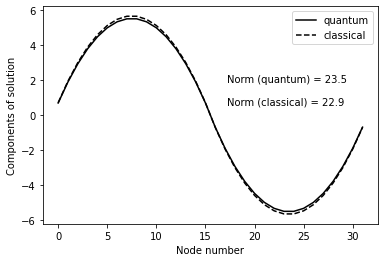

In [7]:
print('Periodic boundary condition, num_qubits:', data_p['num_qubits'][idx1])
q_sol = data_p['q_sol'][idx1][idx2]
cl_sol = data_p['cl_sol'][idx1]
plot_solution_vectors(q_sol, cl_sol)

Dirichlet boundary condition, num_qubits: 5


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Node number', ylabel='Components of solution'>)

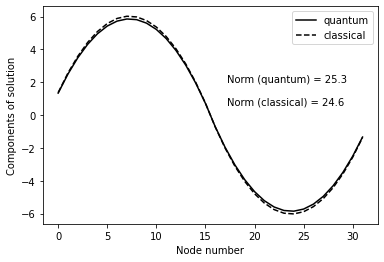

In [8]:
print('Dirichlet boundary condition, num_qubits:', data_p['num_qubits'][idx1])
q_sol = data_d['q_sol'][idx1][idx2]
cl_sol = data_d['cl_sol'][idx1]
plot_solution_vectors(q_sol, cl_sol)

Neumann boundary condition, num_qubits: 5


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Node number', ylabel='Components of solution'>)

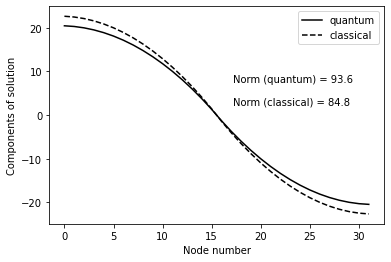

In [9]:
print('Neumann boundary condition, num_qubits:', data_p['num_qubits'][idx1])
q_sol = data_n['q_sol'][idx1][idx2]
cl_sol = data_n['cl_sol'][idx1]
plot_solution_vectors(q_sol, cl_sol)

### trace distance vs # of qubits

In [10]:
errs_m = {'Periodic':[], 'Dirichlet':[], 'Neumann':[]}
errs_s = {'Periodic':[], 'Dirichlet':[], 'Neumann':[]}

for (i, num_qubits) in tqdm(enumerate(data_p['num_qubits'])):

    eps = 0
    eps2 = 0
    eds = 0
    eds2 = 0
    ens = 0
    ens2 = 0
    for j in range(num_trials):
        x = data_p['q_sol'][i][j]
        eps += data_p['err'][i][j]
        eps2 += data_p['err'][i][j]**2
        x = data_d['q_sol'][i][j]
        eds += data_d['err'][i][j]
        eds2 += data_d['err'][i][j]**2
        x = data_n['q_sol'][i][j]
        ens += data_n['err'][i][j]
        ens2 += data_n['err'][i][j]**2
    
    errs_m['Periodic'].append(eps / num_trials)
    errs_s['Periodic'].append(eps2 / num_trials - (eps / num_trials)**2)
    errs_m['Dirichlet'].append(eds / num_trials)
    errs_s['Dirichlet'].append(eds2 / num_trials - (eds / num_trials)**2)
    errs_m['Neumann'].append(ens / num_trials)
    errs_s['Neumann'].append(ens2 / num_trials - (ens / num_trials)**2)

0it [00:00, ?it/s]

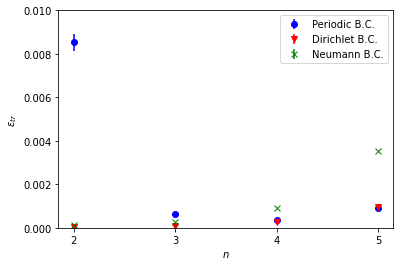

In [11]:
cmap = plt.get_cmap("hsv")
fig=plt.figure()
ax=fig.add_subplot(111)
color = cmap(0/3)
ax.errorbar(data_p['num_qubits'], errs_m['Periodic'], yerr=errs_s['Periodic'], fmt='o', label=r"Periodic B.C.", color='blue')
color = cmap(1/3)
ax.errorbar(data_d['num_qubits'], errs_m['Dirichlet'], yerr=errs_s['Dirichlet'], fmt='v', label=r"Dirichlet B.C.", color='red')
color = cmap(2/3)
ax.errorbar(data_n['num_qubits'], errs_m['Neumann'], yerr=errs_s['Neumann'], fmt='x', label=r"Neumann B.C.", color='green')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\varepsilon_{tr}$')
ax.set_xticks([2, 3, 4, 5])
ax.set_ylim([0, 0.01])
ax.legend()

In [12]:
print('elapsed time: %.2e'%(time.time() - t0))

elapsed time: 3.77e+05
